# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [3]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [259]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [37]:
df_test.shape

(14910, 53)

In [38]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,1,1,1,6,2,1,1580,1580,NaN,train
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,1,1,1,6,1,1,4020,4020,NaN,train
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,1,2,1,11,0,0,0,0,NaN,train
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,6,3,1,"1589,92333333333",1590,NaN,train
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,1,2,1,16,2,1,"1152,15",2230,NaN,train


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [11]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [15]:
#df_train.loc[:, 'sample'].head()
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,1,1,1,6,2,1,1580,1580,NaN,train
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,1,1,1,6,1,1,4020,4020,NaN,train
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,1,2,1,11,0,0,0,0,NaN,train
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,6,3,1,"1589,92333333333",1590,NaN,train
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,1,2,1,16,2,1,"1152,15",2230,NaN,train


In [16]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 52)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 52 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [24]:
# # IgorIzhov: используем подход из задания HW_01 и выводим столбцы с NaN данными
[col_name for col_name in df.columns if df[col_name].count() < df.shape[0]]

['GEN_INDUSTRY',
 'GEN_TITLE',
 'ORG_TP_STATE',
 'ORG_TP_FCAPITAL',
 'JOB_DIR',
 'TP_PROVINCE',
 'REGION_NM',
 'WORK_TIME',
 'PREVIOUS_CARD_NUM_UTILIZED']

In [25]:
# Igor Izhov делем .info() только для стобцов с пропусками
df[[col_name for col_name in df.columns if df[col_name].count() < df.shape[0]]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 9 columns):
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
TP_PROVINCE                   29543 non-null object
REGION_NM                     30131 non-null object
WORK_TIME                     27416 non-null float64
PREVIOUS_CARD_NUM_UTILIZED    600 non-null float64
dtypes: float64(2), object(7)
memory usage: 2.1+ MB


In [302]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(str(set(df_train[i]))[:2000]) # выводим все его значения (но делаем set - чтоб значения не повторялись)
             
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Неполное среднее', 'Два и более высших образования', 'Высшее', 'Неоконченное высшее', 'Среднее специальное', 'Среднее'}


MARITAL_STATUS
{'Состою в браке', 'Вдовец/Вдова', 'Гражданский брак', 'Разведен(а)', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Управляющая компания', 'Образование', 'Коммунальное хоз-во/Дорожные службы', 'Энергетика', 'Металлургия/Промышленность/Машиностроение', 'Логистика', 'СМИ/Реклама/PR-агенства', 'Здравоохранение', 'Банк/Финансы', 'Другие сферы', 'Транспорт', 'Развлечения/Искусство', 'ЧОП/Детективная д-ть', 'Ресторанный бизнес/Общественное питание', 'Нефтегазовая промышленность', 'Маркетинг', 'Информационные услуги', 'Подбор персонала', 'Юридические услуги/нотариальные услуги', 'Страхование', 'Наука', 'Химия/Парфюмерия/Фармацевтика', 'Государственная служба', 'Сборочные производства', 'Сельское хозяйство', 'Информационные технологии', 'Салоны красоты и здоровья', 'Туризм', 'Строительство', 'Недвижимость', 'Торговля'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [152]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float').head()

0     7000.0
1     4100.0
2    40000.0
3    20000.0
4    17000.0
Name: PERSONAL_INCOME, dtype: float64

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [36]:
for col_name in df.columns:
    if df[col_name].dtype != object:
                continue
    if df[col_name].count() < df.shape[0]:
        print('missing:',col_name, df[col_name].dtype)
    else:
        print('OK:',col_name, df[col_name].dtype)

OK: EDUCATION object
OK: MARITAL_STATUS object
missing: GEN_INDUSTRY object
missing: GEN_TITLE object
missing: ORG_TP_STATE object
missing: ORG_TP_FCAPITAL object
missing: JOB_DIR object
OK: FAMILY_INCOME object
OK: PERSONAL_INCOME object
OK: REG_ADDRESS_PROVINCE object
OK: FACT_ADDRESS_PROVINCE object
OK: POSTAL_ADDRESS_PROVINCE object
missing: TP_PROVINCE object
missing: REGION_NM object
OK: CREDIT object
OK: FST_PAYMENT object
OK: LOAN_AVG_DLQ_AMT object
OK: LOAN_MAX_DLQ_AMT object
OK: sample object


In [199]:
[col_name for col_name in df.columns if df[col_name].count() < df.shape[0]]

['GEN_INDUSTRY',
 'GEN_TITLE',
 'ORG_TP_STATE',
 'ORG_TP_FCAPITAL',
 'JOB_DIR',
 'TP_PROVINCE',
 'REGION_NM',
 'WORK_TIME',
 'PREVIOUS_CARD_NUM_UTILIZED']

In [145]:
df_descr.loc[df_descr['ПОЛЕ'].isin([col_name for col_name in df.columns if df[col_name].count() < df.shape[0]])]

,ПОЛЕ,ОПИСАНИЕ
9,GEN_INDUSTRY,отрасль работы клиента
10,GEN_TITLE,должность
11,ORG_TP_STATE,форма собственности компании
12,ORG_TP_FCAPITAL,отношение к иностранному капиталу
13,JOB_DIR,направление деятельности в нутри компании
19,TP_PROVINCE,"область торговой точки, где клиент брал послед..."
20,REGION_NM,регион РФ
39,WORK_TIME,время работы на текущем месте (в месяцах)
50,PREVIOUS_CARD_NUM_UTILIZED,количество уже утилизированных карт ( если пус...


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 52 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [192]:
from sklearn.preprocessing import OneHotEncoder

In [250]:
def preproc_data(df_input):
    df_output = df_input.copy()
    ## Your Code Here
    #1. Remove  AGREEMENT_RK, since it is a unique key identifier => we drop such ID always
    df_output=df_output.drop(['AGREEMENT_RK'], axis=1)
    #2. Convert to float ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    wrong_identifiedL = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT'] 
    for field in wrong_identifiedL:
        df_output[field]=df_output[field].map(lambda x: x.replace(',', '.')).astype('float')
     
    # 3. Fill missing data in ['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE', 'REGION_NM',
     #'WORK_TIME', 'PREVIOUS_CARD_NUM_UTILIZED'] with most frequent value of the corresponding column
    missingL = [col_name for col_name in df_output.columns if df_output[col_name].count() < df_output.shape[0]]
    missingL.remove('PREVIOUS_CARD_NUM_UTILIZED')
    for field in missingL:
        #print(field) // Since aproach is dangerous -> check columns at first run 
        df_output[field] = df_output[field].fillna(df_output[field].value_counts().idxmax())
    #3.1 fill 'PREVIOUS_CARD_NUM_UTILIZED' with 0 since this is prescribed in description
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
        
    # 4. Convert categorial features with One Hot Encoding
    categorialL = [col_name for col_name in df_input.columns if df_input[col_name].dtype == object and col_name not in wrong_identifiedL]
    categorialL.remove('sample')
    #print(categorialL)   // check categorialL at first run 
    # First try with Pandas one hot
    df_output= pd.get_dummies(df_output, columns= categorialL)
    return df_output

In [251]:
tmp = preproc_data(df)

In [245]:
for col_name in tmp.columns:
    if tmp[col_name].dtype != object:
                continue
    if tmp[col_name].count() < tmp.shape[0]:
        print('missing:',col_name, tmp[col_name].dtype)
    else:
        print('OK:',col_name, tmp[col_name].dtype)

OK: sample object


In [254]:
tmp['TARGET'].value_counts()

0    26571
1     3562
Name: TARGET, dtype: int64

In [246]:
# Проверяем пропуски - OK
[col_name for col_name in tmp.columns if tmp[col_name].count() < tmp.shape[0]]

[]

In [216]:
tmp['sample'].head(10)

0    test
1    test
2    test
3    test
4    test
5    test
6    test
7    test
8    test
9    test
Name: sample, dtype: object

In [252]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)


In [293]:
df_preproc.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 444 columns):
TARGET                                                    30133 non-null int64
AGE                                                       30133 non-null int64
SOCSTATUS_WORK_FL                                         30133 non-null int64
SOCSTATUS_PENS_FL                                         30133 non-null int64
GENDER                                                    30133 non-null int64
CHILD_TOTAL                                               30133 non-null int64
DEPENDANTS                                                30133 non-null int64
PERSONAL_INCOME                                           30133 non-null float64
REG_FACT_FL                                               30133 non-null int64
FACT_POST_FL                                              30133 non-null int64
REG_POST_FL                                               30133 non-null int64
REG_FACT_POST_FL   

In [249]:
df_preproc.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
0,0,30,1,0,1,1,1,7000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,48,0,1,1,0,0,4100.0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,0,35,1,0,0,1,0,40000.0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0,22,1,0,0,0,0,20000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,27,1,0,1,2,2,17000.0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [262]:
df_test.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test


In [270]:
# Признаки и целевые вектора
X=df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)
y= df_train_preproc['TARGET']
y_test= df_test_preproc['TARGET']

In [276]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5024 entries, 21229 to 27435
Columns: 442 entries, AGE to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(30), uint8(405)
memory usage: 3.4 MB


#### Задание 5. Обучение и оценка качества разных моделей

In [272]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [277]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5024 entries, 21229 to 27435
Columns: 442 entries, AGE to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(30), uint8(405)
memory usage: 3.4 MB


In [343]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

metricsD = {}
## Your Code Here
print('1. DecisionTreeClassifier is running')
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)
dtc_predict_proba = dtc.predict_proba(X_test)
metricsD['dtc']={'predict':dtc_predict,'predict_proba':dtc_predict_proba,'metric_name':'DecisionTreeClassifier'}
print('2. RandomForestClassifier is running')
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
rfc_predict_proba = rfc.predict_proba(X_test)
metricsD['rfc']={'predict':rfc_predict,'predict_proba':rfc_predict_proba,'metric_name':'RandomForestClassifier'}
print('3. LogisticRegression is running')
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_predict_proba = lr.predict_proba(X_test)
metricsD['lr']={'predict':lr_predict,'predict_proba':lr_predict_proba,'metric_name':'LogisticRegression'}
print('all black boxes finished')


1. DecisionTreeClassifier is running
2. RandomForestClassifier is running
3. LogisticRegression is running
all black boxes finished


In [345]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

## Your Code Here
for a in metricsD:
    print ('*'*10,metricsD[a]['metric_name'])
    metricsD[a]['metric_scoreD'] = {}
    metricsD[a]['metric_scoreD']['precision'] = precision_score(y_test, metricsD[a]['predict']) 
    metricsD[a]['metric_scoreD']['recall'] = recall_score(y_test, metricsD[a]['predict']) 
    metricsD[a]['metric_scoreD']['accuracy'] = accuracy_score(y_test, metricsD[a]['predict']) 
    
    print('precision %s'%(a), metricsD[a]['metric_scoreD']['precision'])
    print('recall %s'%(a),  metricsD[a]['metric_scoreD']['recall'])
    print('accuracy %s'%(a),  metricsD[a]['metric_scoreD']['accuracy'])
    print ('\n')
    


********** DecisionTreeClassifier
precision dtc 0.1488095238095238
recall dtc 0.16393442622950818
accuracy dtc 0.7846337579617835


********** RandomForestClassifier
precision rfc 0.2
recall rfc 0.006557377049180328
accuracy rfc 0.8761942675159236


********** LogisticRegression
precision lr 0.4
recall lr 0.003278688524590164
accuracy lr 0.8783837579617835




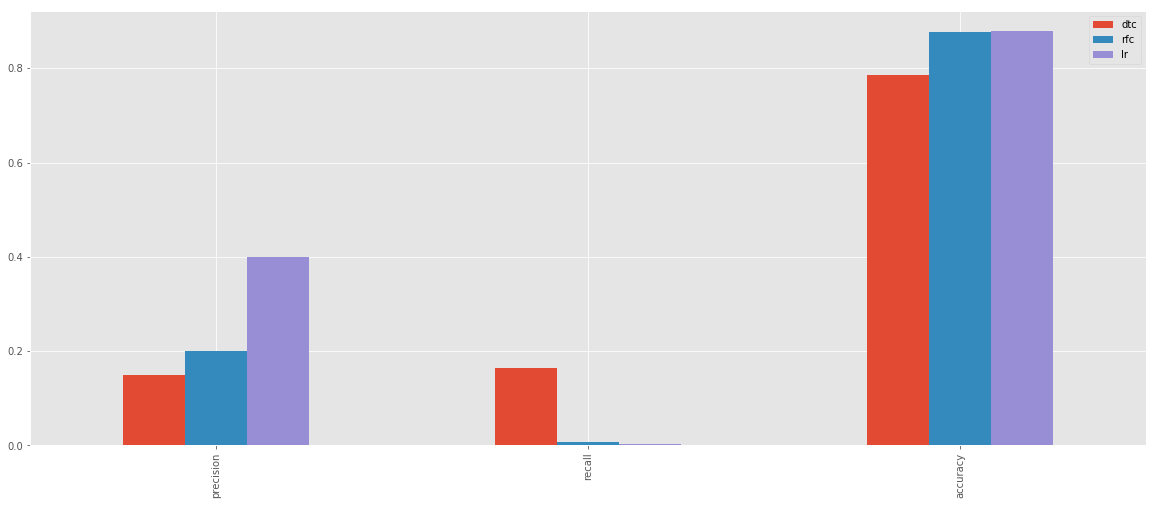

In [352]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
import matplotlib.pyplot as plt
%matplotlib inline
metric_visD = {}
for a in metricsD:
    metric_visD[a]=[]
    for b in metricsD[a]['metric_scoreD']:
        #print(b)
        metric_visD[a].append(metricsD[a]['metric_scoreD'][b]) 
        
metric_df = pd.DataFrame(data=metric_visD, index=['precision', 'recall', 'accuracy'])   

_, ax = plt.subplots(figsize=(20,8))
metric_df.plot(kind='bar', stacked=False, ax=ax)
plt.show()

In [354]:
metricsD

{'dtc': {'predict': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
  'predict_proba': array([[1., 0.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]]),
  'metric_name': 'DecisionTreeClassifier',
  'metric_scoreD': {'precision': 0.1488095238095238,
   'recall': 0.16393442622950818,
   'accuracy': 0.7846337579617835}},
 'rfc': {'predict': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
  'predict_proba': array([[0.8, 0.2],
         [0.7, 0.3],
         [0.7, 0.3],
         ...,
         [1. , 0. ],
         [1. , 0. ],
         [1. , 0. ]]),
  'metric_name': 'RandomForestClassifier',
  'metric_scoreD': {'precision': 0.2,
   'recall': 0.006557377049180328,
   'accuracy': 0.8761942675159236}},
 'lr': {'predict': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
  'predict_proba': array([[0.73284348, 0.26715652],
         [0.94263295, 0.05736705],
         [0.79455064, 0.20544936],
         ...,
         [0.95619985, 0.04380015],
         

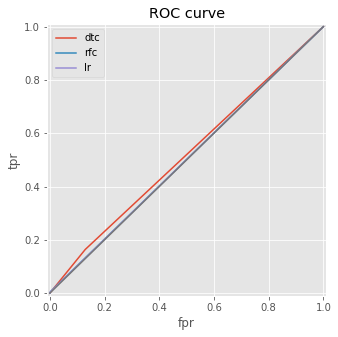

In [398]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure(figsize=(5, 5))
for a in metricsD:
    fpr, tpr, thresholds = roc_curve(y_test, metricsD[a]['predict'])
    plt.plot(fpr, tpr, label =a)

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

In [388]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
dtc_cv_score = cross_val_score(
    dtc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
rfc_cv_score = cross_val_score(
    rfc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)

lr_cv_score = cross_val_score(
    lr,
    X,
    y,
    scoring='roc_auc',
    cv=10
)

print ('dtc:',dtc_cv_score.mean(),'rfc:',rfc_cv_score.mean(),'lr:',lr_cv_score.mean())
## Your Code Here

dtc: 0.5317032235587329 rfc: 0.5873448115320766 lr: 0.652572710964936


In [395]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here
lr.fit(X_test, y_test)
predict_result = lr.predict_proba(X_test)
predict_result

array([[0.67555034, 0.32444966],
       [0.93334047, 0.06665953],
       [0.70574537, 0.29425463],
       ...,
       [0.96903312, 0.03096688],
       [0.94075522, 0.05924478],
       [0.80057087, 0.19942913]])

(-0.01, 1.01)

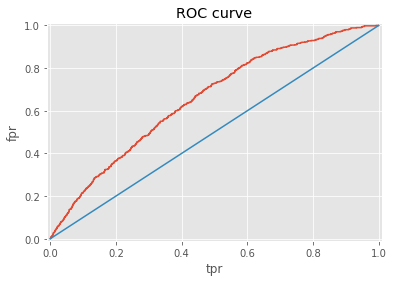

In [399]:
# Померить roc_auc на тесте
fpr_lrc, tpr_lrc, thresholds_lrc = roc_curve(y_test, predict_result[:,1])
plt.plot(fpr_lrc, tpr_lrc, label='lr')

plt.plot([0, 1], [0, 1])
plt.ylabel('fpr')
plt.xlabel('tpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))